# Data preparation
### Census of ground floor stores in Barcelona, year 2019

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/2019_censcomercialbcn_detall.csv')
print(data.shape)
data.head()

(80554, 49)


/home/antonia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


There are a lot of features!
- Features about type of activity (*Nom_Sector_Activitat*, *Nom_Grup_Activitat*, *Nom_Activitat* and their correspondant codes)
- Features about location (latitude, longitude, street, number...)
- Features indicating if a store is in a shopping mall, or commercial hub, food market...
- Features indicating if a store is active, empty, for sale, for rent... (*Nom_Sector_Activitat* and its correspondant code)
- The features that begin by SN are yes/no features (**S**i/**N**o). For example, *SN_Obert24h* denotes if a stores is open 24h or not

## Field description
**ID_Bcn_2019 (int64):** Unique identifier of each store for the year 2019

**ID_Bcn_2016 (float64):** Unique identifier of each store for the year 2016

**Codi_Principal_Activitat (int64):** Code to identify if a store is active (1), inactive (0) or without information (NaN)

**Nom_Principal_Activitat (string):** Description of activity (Actiu) or inactivity (Sense activitat Econòmica) of a store

**Codi_Sector_Activitat (int64):** Code to identify the economic sector of a store

**Nom_Sector_Activitat (string):** Description of the economic sector of a store:
- 'Serveis': Services
- 'Altres': Others
- 'Comerç al detall': Retail shop
- 'Sense informació': Without information
- 'Sense informació - Havia tingut activitat (rètol)': Without information - Has had activity (sign)
- 'En reforma': Refurbishing
- 'Locals buits en venda i lloguer': Empty store for sale and rent
- 'Locals buits en lloguer': Empty store for rent
- 'Locals buits en venda': Empty store for sale
- 'Comerç al detall /Engròs': Retail/Wholesale shop

**Codi_Grup_Activitat (int64):** Code to identify the activity group

**Nom_Grup_Activitat (string):** Name of the activity group
- 'Altres': Others
- 'Automoció': Automotive
- 'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)': Restaurants, pubs and hotels (includes guesthouses, hostels and inns) 
- 'Parament de la llar': Household goods
- 'Quotidià alimentari': Grocery shops
- 'Quotidià no alimentari': Daily shops (includes pharmacies, drugstores, tobacconists, gas stations and herbalist's shops)
- 'Equipament personal': Personal apparel
- 'Ensenyament': Education
- 'Grup no definit': Undefined group
- 'Reparacions (Electrodomèstics i automòbils)': Repairs (appliances and cars)
- 'Sanitat i assistència': Healthcare 
- 'Finances i assegurances': Finances and insurers
- 'Equipaments culturals i recreatius': cultural and recreational equipment
- 'Activitats immobiliàries': Real Estate activities
- 'Oci i cultura': Leisure and culture
- 'Manteniment, neteja i producció': Maintenance and cleaning

**Codi_Activitat_2019 (int64):** Code to identify the activity of the store (2019)

**Nom_Activitat (string):** Name of the activity
- 'Ensenyament': Education
- 'Restaurants': Restaurants
- 'Floristeries': Florists
- 'Fruites i verdures': Fruit shop
- 'Drogueria i perfumeria': Drugstore
- 'Vestir': Clothing stores
- 'Ous i aus': Poulterers
- ...

**Codi_Activitat_2016 (string):** Code to identify the activity of the store (2016)

**Nom_Local (string):** Name of the store

**SN_Oci_Nocturn (int64):** Binary to indicate if the activity belongs to the nightlife sector or not

**SN_Coworking (int64):** Binary to indicate if there is coworking or not

**SN_Servei_Degustacio (int64):** Binary to indicate if the store has product sample tasting or not

**SN_Obert24h (int64):** Binary to indicate if the store opens 24h or not

**SN_Mixtura (int64):** Binary to indicate if there are mixed activities or not

**SN_Carrer (int64):** Binary to indicate if the store is right by the street or not

**SN_Mercat (int64):** Binary to indicate if the store is inside a food market or not

**Nom_Mercat (string):** Name of the food market

**SN_Galeria (int64):** Binary to indicate if the store belongs to a shopping arcade or not

**Nom_Galeria (string):** Name of the shopping arcade

**SN_CComercial (int64):** Binary to indicate if the store belongs to a shopping mall or not

**Nom_CComercial (string):** Name of the shopping mall

**SN_Eix (int64):** Binary to indicate if the stores belongs to a commercial hub or not

**Nom_Eix (string):** Name of the commercial hub

**X_UTM_ETRS89 (float64):** x coord UTM ETRS89, in meters

**Y_UTM_ETRS89 (float64):**  coord UTM ETRS89, in meters

**Latitud (float64):** Latitude

**Longitud (float64):** Longitude

**Direccio_Unica (string):** Unique adress of the store

**Codi_Via (int64):** Street's code

**Nom_Via (string):** Street's name

**Planta (string):** ? All are LOC

**Porta (float64):** Commercial space number

**Num_Policia_Inicial (string):** Street number, inicial

**Lletra_Inicial (string):** Street number letter, inicial

**Num_Policia_Final (string):** Street number, final

**Lletra_Final (string):** Street number letter, final

**Solar (float64):** Code of the plot of land

**Codi_Parcela (float64):** Code of the smallholding

**Codi_Illa (float64):** Code of the block

**Seccio_Censal (float64):** Code of the census section

**Codi_Barri (int64):** Code of the neighbourhood

**Nom_Barri (string):** Name of the neighbourhood

**Codi_Districte (int64):** Code of the district

**Nom_Districte (string):** Name of the district

**Referencia_cadastral (string):** Tax registry number

**Data_Revisio (float64):** Date of last data update

## Missing values

<AxesSubplot:>

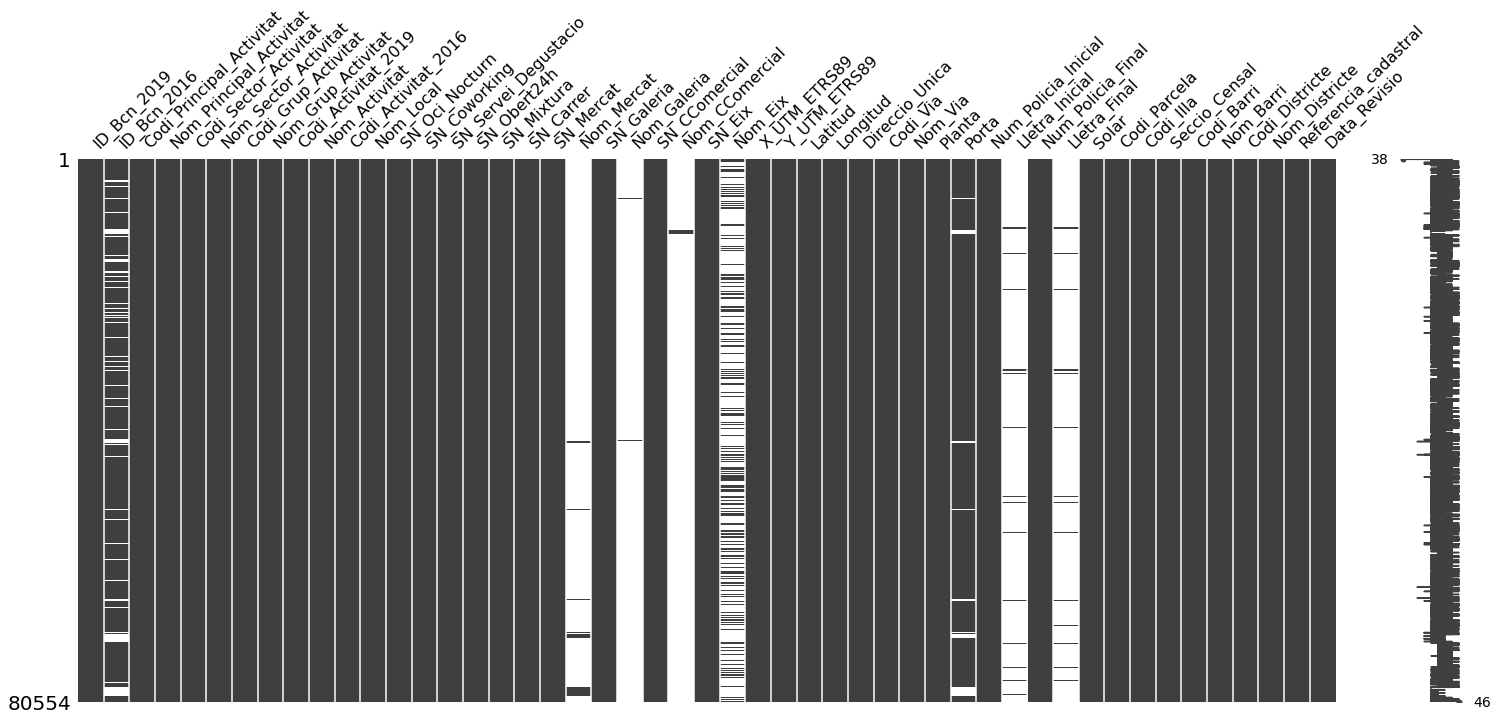

In [3]:
import missingno as msno
msno.matrix(data)

Explanation of the missing values:
- *ID_Bcn_2016* is the store code for the 2016 dataset. The stores that doesn't have this code have probably opened after 2016.
- *Nom_Mercat* is the name of the food market where the store is located. A lot of stores are not inside food markets, that's why this column has so many missing values.
- *Nom_Galeria*, *Nom_CComercial* and *Nom_Eix* are, respectively, the name of the shopping arcade, shopping mall or shopping district where the store is located. These can be explained like the *Nom_Mercat* column.
- Some street numbers have also letters, but many others don't, that's why *Lletra inicial* and *LLetra final* have so many missing values.

## Aggregations per neighbourhood

### Number of stores per neighbourhood

In [6]:
groupby_object = data.groupby(by='Nom_Barri')
count_shops = groupby_object.count()['ID_Bcn_2019'].reset_index().rename(columns={'ID_Bcn_2019':'no_stores'})
count_shops

,Nom_Barri,no_stores
0,Baró de Viver,77
1,Can Baró,309
2,Can Peguera,44
3,Canyelles,175
4,Ciutat Meridiana,203
...,...,...
68,la Vila Olímpica del Poblenou,457
69,la Vila de Gràcia,4457
70,les Corts,2428
71,les Roquetes,617


### Number of each type of group activity per neighbourhood

In [42]:
group_activity_value_counts = groupby_object['Nom_Grup_Activitat'].value_counts(normalize=True).reset_index(name='count')
group_activity_value_counts = pd.pivot_table(group_activity_value_counts, 
                                   values='count', 
                                   columns=['Nom_Grup_Activitat'], index=['Nom_Barri'], fill_value=0)
group_activity_value_counts = group_activity_value_counts.reset_index(drop=False)
group_activity_value_counts.head()

Nom_Grup_Activitat,Nom_Barri,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,Baró de Viver,0.000000,0.142857,0.000000,0.051948,0.000000,0.038961,0.000000,0.571429,0.000000,0.000000,0.012987,0.064935,0.025974,0.000000,0.077922,0.012987
1,Can Baró,0.000000,0.203883,0.000000,0.009709,0.006472,0.006472,0.003236,0.553398,0.000000,0.006472,0.006472,0.077670,0.035599,0.022654,0.061489,0.006472
2,Can Peguera,0.000000,0.204545,0.000000,0.068182,0.000000,0.045455,0.000000,0.522727,0.000000,0.000000,0.000000,0.022727,0.045455,0.000000,0.045455,0.045455
3,Canyelles,0.005714,0.131429,0.005714,0.028571,0.011429,0.011429,0.017143,0.394286,0.005714,0.000000,0.005714,0.194286,0.051429,0.028571,0.102857,0.005714
4,Ciutat Meridiana,0.004926,0.182266,0.000000,0.029557,0.024631,0.004926,0.039409,0.384236,0.000000,0.014778,0.014778,0.147783,0.034483,0.014778,0.088670,0.014778


In [43]:
# group_activity_value_counts.to_csv('./data/cleaned/activity_groups_by_neighbourhood.csv', index=False)

In [51]:
data[data['Nom_Sector_Activitat'] == 'Serveis']['Nom_Activitat'].unique()

array(['Serveis a les empreses i oficines', 'Activitats emmagatzematge',
       'Activitats de transport ', 'Restaurants', 'Ensenyament',
       'Reparacions (Electrodomèstics i automòbils)',
       'Sanitat i assistència', 'Finances i assegurances',
       "serveis d'allotjament", 'Bars   / CIBERCAFÈ',
       'Equipaments culturals i recreatius', "Centres d'estètica",
       'Xocolateries / Geladeries / Degustació',
       'Activitats immobiliàries', 'Perruqueries',
       'Serveis de menjar take away MENJAR RÀPID', 'Serveis Socials',
       'Activitats de transport i emmagatzematge', 'Altres',
       'Manteniment, neteja i similars', 'Veterinaris / Mascotes',
       'Bars especials amb actuació / Bars musicals / Discoteques /PUB',
       'Pàrquings i garatges', 'Tintoreries', 'Arranjaments',
       'Agències de viatge', 'Serveis de telecomunicacions',
       'serveis de menjar i begudes', 'Locutoris', 'altres',
       'Altres ( per exemple VENDING)'], dtype=object)